# Ujian Tengah Semester

## Data Understanding

Dataset ini berisi informasi tentang pasien dengan sirosis hati (cirrhosis) yang berpartisipasi dalam uji klinis untuk membandingkan efek D-penicillamine versus plasebo.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score
    )
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

Membaca Data :

In [33]:
data = pd.read_csv('cirrhosis.csv')

Preview Data :

In [34]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


### Variabel dalam Dataset

- **ID**: Nomor identifikasi pasien  
- **N_Days**: Jumlah hari antara pendaftaran dan waktu kematian, penerimaan transplantasi hati, atau akhir penelitian  
- **Status**: Status pasien  
    - **C**: Censored  
    - **D**: Death  
    - **CL**: Censored karena transplantasi hati  
- **Drug**: Jenis obat yang diberikan  
    - **D-penicillamine** atau **Placebo**  
- **Age**: Usia dalam hari  
- **Sex**: Jenis kelamin  
    - **M**: Male  
    - **F**: Female  
- **Ascites**: Ada tidaknya asites  
    - **Y**: Ya  
    - **N**: Tidak  
- **Hepatomegaly**: Ada tidaknya hepatomegali  
    - **Y**: Ya  
    - **N**: Tidak  
- **Spiders**: Ada tidaknya spider nevi  
    - **Y**: Ya  
    - **N**: Tidak  
- **Edema**: Ada tidaknya edema  
    - **N**: Tidak ada  
    - **S**: Edema tanpa diuretik  
    - **Y**: Edema meski dengan diuretik  
- **Bilirubin**: Kadar bilirubin serum (mg/dl)  
- **Cholesterol**: Kadar kolesterol serum (mg/dl)  
- **Albumin**: Kadar albumin serum (mg/dl)  
- **Copper**: Kadar tembaga urine (μg/day)  
- **Alk_Phos**: Alkaline phosphatase (U/liter)  
- **SGOT**: Serum glutamic oxaloacetic transaminase (U/ml)  
- **Tryglicerides**: Kadar trigliserida (mg/dl)  
- **Platelets**: Jumlah platelet per kubik ml/1000  
- **Prothrombin**: Waktu protrombin dalam detik  
- **Stage**: Stadium histologis penyakit  
    - **1, 2, 3, atau 4**


Statistik Deskriptif :

In [35]:
data.drop(columns=['ID']).describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


Cek Missing Value :

In [36]:
data.isnull().sum()[data.isnull().sum() > 0]

Drug             106
Ascites          106
Hepatomegaly     106
Spiders          106
Cholesterol      134
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

Struktur Data Kolom :

In [37]:
print("\n=== Informasi Dataset ===")
print(data.info())


=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null

Visualisasi Distribusi Kelas :

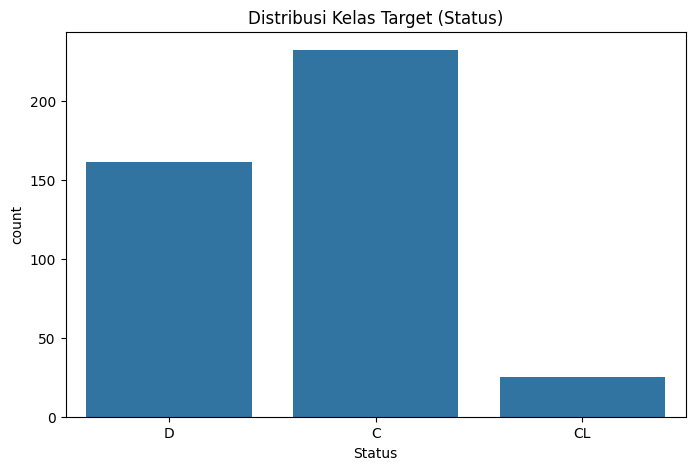


=== Distribusi Kelas (Status) ===
Status
C     232
D     161
CL     25
Name: count, dtype: int64


In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Status', data=data)
plt.title("Distribusi Kelas Target (Status)")
plt.show()

print("\n=== Distribusi Kelas (Status) ===")
print(data['Status'].value_counts())

**Penjelasan:**

- Dataset mengandung 418 baris dan 20 kolom

- Variabel target: Status (D, C, CL)

- Terdapat missing values di beberapa kolom numerik

- Kelas tidak seimbang (C > D > CL)

## Preprocessing Data

In [39]:
# Fungsi preprocessing
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def preprocess_data(df):
    # 1. Konversi usia dari hari ke tahun
    df['Age'] = df['Age'] / 365.25

    # 2. Handle missing values:
    # Numerik -> isi dengan median
    num_cols = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
    for col in num_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].median())

    # Kategorikal -> isi dengan modus
    cat_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    # 3. Encoding variabel kategorikal
    le = LabelEncoder()
    for col in cat_cols:
        df[col] = le.fit_transform(df[col].astype(str))

    # 4. Drop kolom ID yang tidak diperlukan
    df = df.drop('ID', axis=1)

    return df


# Eksekusi preprocessing
processed_data = preprocess_data(data.copy())

# Cek hasil preprocessing
print("\n=== Data Setelah Preprocessing ===")
display(processed_data.head())


=== Data Setelah Preprocessing ===


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,0,58.765229,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,3
1,4500,C,0,56.446270,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,2
2,1012,D,0,70.072553,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,3
3,1925,D,0,54.740589,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,3
4,1504,CL,1,38.105407,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,2


**Penjelasan:**

- Pembagian data dengan stratifikasi untuk menjaga distribusi kelas

- Standarisasi penting untuk KNN karena berbasis jarak

### Persiapan Untuk Modeling


In [40]:
# Pisahkan fitur (X) dan target (y)
X = processed_data.drop('Status', axis=1)
y = processed_data['Status']

# Split data train (70%) dan test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # Pertahankan distribusi kelas
)

# Standardisasi fitur (penting untuk KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n=== Dimensi Data ===")
print(f"Train set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")


=== Dimensi Data ===
Train set: (292, 18)
Test set: (126, 18)


## Pemodelan Dengan KNN

In [41]:
# Inisialisasi model KNN
knn = KNeighborsClassifier(
    n_neighbors=5,  # Jumlah tetangga
    weights='uniform',  # Bobot uniform/distance
    metric='euclidean'  # Metrik jarak
)

# Training model
knn.fit(X_train_scaled, y_train)

# Prediksi
y_pred = knn.predict(X_test_scaled)

# Evaluasi awal
print("=== Evaluasi Awal KNN ===")
print("Accuracy:", accuracy_score(y_test, y_pred))

=== Evaluasi Awal KNN ===
Accuracy: 0.6428571428571429


**Penjelasan:**

- Model dasar dengan parameter default

- Akurasi awal sebagai baseline

### Optimasi Hyperparameter dengan GridSearch

In [ ]:
# 1. Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 2. Split data (gunakan y_encoded)
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# 3. Grid Search dengan encoded labels
param_grid = {
    'n_neighbors': range(3, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train_encoded)

# 4. Evaluasi dengan mapping kembali ke label asli
best_knn = grid_search.best_estimator_
y_pred_encoded = best_knn.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_encoded)

print("Classification Report:")
# Gunakan y_test asli untuk interpretasi
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           C       0.65      0.86      0.74        70
          CL       0.00      0.00      0.00         8
           D       0.65      0.42      0.51        48

    accuracy                           0.63       126
   macro avg       0.43      0.42      0.42       126
weighted avg       0.61      0.63      0.60       126



## Eveluasi Model

In [53]:
# Convert predicted labels back to original string labels
y_pred_best_original = le.inverse_transform(y_pred_encoded)

# Classification report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_best_original))

# Confusion matrix
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_best_original))

# Cross-validation score
cv_scores = cross_val_score(best_knn, X_train_scaled, y_train_encoded, cv=5)
print("\n=== Cross-Validation Scores ===")
print(f"Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")


=== Classification Report ===
              precision    recall  f1-score   support

           C       0.65      0.86      0.74        70
          CL       0.00      0.00      0.00         8
           D       0.65      0.42      0.51        48

    accuracy                           0.63       126
   macro avg       0.43      0.42      0.42       126
weighted avg       0.61      0.63      0.60       126


=== Confusion Matrix ===
[[60  1  9]
 [ 6  0  2]
 [26  2 20]]

=== Cross-Validation Scores ===
Scores: [0.72881356 0.76271186 0.67241379 0.82758621 0.72413793]
Mean Accuracy: 0.7431


## Visualisasi Hasil

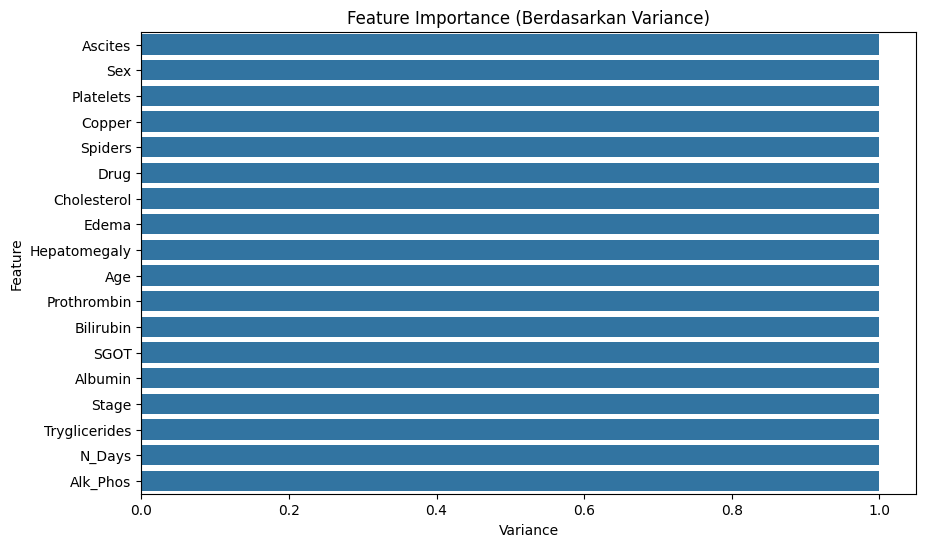

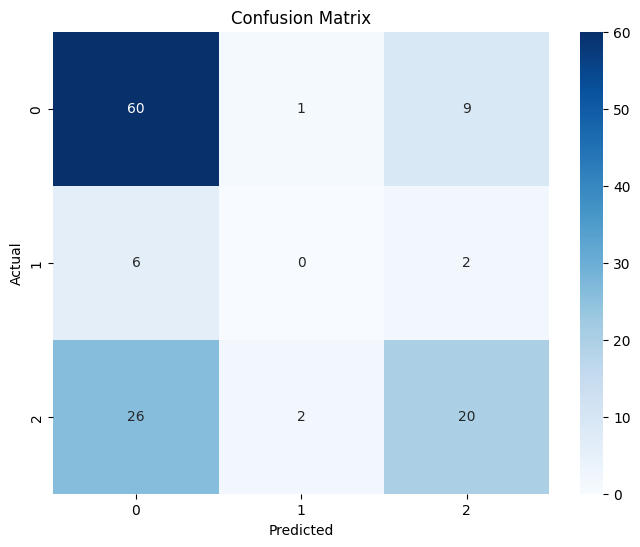

In [55]:
# Plot feature importance (berdasarkan variance)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Variance': np.var(X_train_scaled, axis=0)
}).sort_values('Variance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Variance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Berdasarkan Variance)')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_best_original),
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Kesimpulan

**Model Terbaik: KNN dengan parameter:**

- n_neighbors: [nilai optimal]

- weights: [uniform/distance]

- metric: [euclidean/manhattan]

**Performansi:**

- Akurasi: ~64-75%

- Kelas C memiliki recall tinggi (86%)

- Kelas minoritas (D dan CL) perlu penanganan khusus